## *Bankers in the Ivory Tower*
### By Charlie Eaton

### Make public university data Figures 6.3 and 6.5

In [32]:
pwd

/Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 6 - The Middle - Publics/
> data


In [33]:
use d6_3_5_ipeds_instate_debt_bond, clear
save old_d6_3_5_ipeds_instate_debt_bond, replace



file old_d6_3_5_ipeds_instate_debt_bond.dta saved


In [34]:
keep unitid year instatefrosh stabbr systemid control instnm systemnm fips sector iclevel ///
ftfirstefbkaat ftfirstefhispt ftfirsteftotlt admissions interest2 interest01 fte_count total03_revenue total01 ///
instate total_frosh_res state03 state09 nettuition01 loan_t fgrnt_t fgrnt_d loan_d fgrnt_n loan_n ///
loan_a loan_p ftfirsteftotlt ucall biggest applicants

In [35]:
drop if year<2000
keep if control==1


(0 observations deleted)

(0 observations deleted)


In [36]:
save d6_3_5_ipeds_instate_debt_bond, replace

file d6_3_5_ipeds_instate_debt_bond.dta saved


In [37]:
describe, size


Contains data from d6_3_5_ipeds_instate_debt_bond.dta
 Observations:        43,505                  
    Variables:            35                  21 Feb 2022 16:30
         Size:    16,749,425                  
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
unitid          double  %12.0g                UNITID
fgrnt_n         long    %8.0g                 FGRNT_N
fgrnt_t         long    %12.0g                FGRNT_T
loan_n          long    %8.0g                 LOAN_N
loan_p          byte    %8.0g                 LOAN_P
loan_t          double  %12.0g                LOAN_T
loan_a          double  %12.0g                LOAN_A
year            float   %10.0g                
instnm          str105  %105s                 INSTNM
stabbr          str2    %9s                   Stat

In [6]:
tab year


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1974 |        879        0.25        0.25
       1975 |        865        0.25        0.50
       1976 |        857        0.25        0.75
       1977 |        853        0.25        0.99
       1978 |        885        0.25        1.25
       1979 |        902        0.26        1.51
       1980 |        860        0.25        1.75
       1981 |      3,682        1.06        2.81
       1982 |      3,680        1.06        3.87
       1983 |        967        0.28        4.15
       1984 |      1,001        0.29        4.43
       1985 |      3,749        1.08        5.51
       1986 |      3,758        1.08        6.59
       1987 |     13,118        3.77       10.36
       1988 |     14,121        4.06       14.42
       1989 |     13,366        3.84       18.26
       1990 |     11,923        3.43       21.69
       1991 |     11,293        3.25       24.93
       1992 |     1

In [2]:
set more off
use d6_3_5_ipeds_instate_debt_bond, clear
describe, size
ds





 Observations:       347,974                  
    Variables:            96                  21 Feb 2022 14:33
         Size:   364,676,752                  
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
unitid          double  %12.0g                UNITID
fgrnt_n         long    %8.0g                 FGRNT_N
fgrnt_p         byte    %8.0g                 FGRNT_P
fgrnt_t         long    %12.0g                FGRNT_T
fgrnt_a         long    %8.0g                 FGRNT_A
loan_n          long    %8.0g                 LOAN_N
loan_p          byte    %8.0g                 LOAN_P
loan_t          double  %12.0g                LOAN_T
loan_a          double  %12.0g                LOAN_A
npis412         long    %8.0g                 NPIS412
year            float   %10.0g         

In [1]:
quietly {
set more off
use "/Users/Charlie/Dropbox/Private Equity ForProfit Colleges/Data/College Scorecard/CollegeScorecard_Raw_Data/scorecardfull.dta", clear

merge m:1 unitid using "/Users/Charlie/Google Drive/Lincoln Project/State-Based Financial Aid/Code/Sheisha defaultcorraid/HB_classifications_2014_8_26.dta"
merge m:1 year using "/Users/Charlie/Google Drive/Lincoln Project/CAE/cpi_scalar_2016.dta", nogen

drop if control>2
drop if unitid==110398 | unitid==119678
gen ucall=1 if unitid == 110635 | unitid == 110644	| unitid == 110653 ///
| unitid == 110662	| unitid == 110671	| unitid == 110680	| unitid == 110699	///
| unitid == 110705	| unitid == 110714	///
| unitid == 445188 | unitid== 124557

gen csu = 1 if unitid==122409 | unitid==110556 | unitid==110538 | unitid==110510 | unitid==122755 | unitid==110608 | unitid==110565 | unitid==441937 | unitid==110574 | unitid==122597 | unitid==366711 | unitid==110547 | unitid==409698 | unitid==110592 | unitid==110422 | unitid==110486 | unitid==110501 | unitid==110495 | unitid==110617 | unitid==115755 | unitid==110529 | unitid==111188 | unitid==110583 | unitid==123572

gen segment=1 if ucall==1
replace segment=2 if csu==1
replace segment=3 if control==1 & stabbr~="CA" & highdeg>2
replace segment=4 if control==2 & highdeg>2

foreach var in lo_inc_debt_mdn md_inc_debt_mdn hi_inc_debt_mdn {
replace `var'=`var' / cpi_scalar_2016
}
drop if segment==.
collapse (mean) lo_inc_debt_mdn md_inc_debt_mdn hi_inc_debt_mdn lo_inc_rpy_3yr_rt_supp ///
    md_inc_rpy_3yr_rt_supp hi_inc_rpy_3yr_rt_supp, by(segment year)
drop if year==1997

label var lo_inc_debt_mdn "$0-30k"
label var md_inc_debt_mdn "$30-75k"
label var hi_inc_debt_mdn "Over 75k"
label var lo_inc_rpy_3yr_rt_supp "$0-30k"
label var md_inc_rpy_3yr_rt_supp "$30-75k"
label var hi_inc_rpy_3yr_rt_supp "Over 75k"
label var lo_inc_rpy_3yr_rt "$0-30k"
label var md_inc_rpy_3yr_rt "$30-75k"
label var hi_inc_rpy_3yr_rt "Over 75k"

*label define segments 1 "UC Flagships" 2 "Other UCs" 3 "CSUs" 4 "Community Colleges" 5 "US Public Universities"
*label values segment segments

label define segments 1 "UCs" 2 "CSUs" 3 "US public universities" 4 "Private universities"
label values segment segments
    
quietly tw (connect lo_inc_debt_mdn md_inc_debt_mdn hi_inc_debt_mdn year), ///
by(segment, compact row(1) note("")  legend(off)) ///
xlab(2000(4)2016,angle(45) labsize(medium)) xtitle("") ylab(0 "$0" 10000 "$10k" 20000 "$20k", ///
labsize(medium)) ytitle("Median debt after school" " ", size(medium)) ///
xsize(8.5) aspect(1.25) name(averagedebt, replace) scheme(plotplainblind)

replace lo_inc_rpy_3yr_rt_supp=lo_inc_rpy_3yr_rt_supp*100
replace md_inc_rpy_3yr_rt_supp=md_inc_rpy_3yr_rt_supp*100
replace hi_inc_rpy_3yr_rt_supp=hi_inc_rpy_3yr_rt_supp*100
quietly replace year=year-3
quietly drop if year<2007
quietly tw (connect lo_inc_rpy_3yr_rt_supp md_inc_rpy_3yr_rt_supp hi_inc_rpy_3yr_rt_supp year), ///
by(segment, compact row(1) note("") legend(off)) ylab(50(20)90) ///
legend(title("Household income") order(3 2 1) pos(6)) ///
xlab(2007(2)2013,angle(45) labsize(medium)) xtitle("") ylab(, labsize(medium)) ///
    ytitle("% who repaid at least $1" "after 3 years" " ", size(medium)) ///
xsize(8.5) aspect(1.25) name(repaymentrate, replace) scheme(plotplainblind)
}
grc1leg averagedebt repaymentrate, col(1) iscale(.8) imargin(zero) legendfrom(repaymentrate)
graph display
graph export f3_studentdebt_bankers6.pdf, replace

In [2]:
quietly {
set line 140
cd "/Users/Charlie/Google Drive/Lincoln Project/IPEDS Disaggregated/Data"
use unitid year loan_n loan_p loan_a loan_t fgrnt_n fgrnt_p fgrnt_a fgrnt_t npis412 using finaid_2000_2017, clear
replace year=year+1
merge 1:1 unitid year using hd_flags_1981_2019.dta, keepusing(instnm control iclevel stabbr sector fips) gen(aidmerge)
merge 1:1 unitid year using froshresidence20182001, gen(residencemerge) 
merge 1:1 unitid year using frosh_residence_1993_201920200502, gen(residencemerge2) keepusing(biggeststate4frosh) 
merge 1:1 unitid year using "IPEDS asymmetry prepped 20191229.dta", keepusing(systemid systemnm owner_pe) gen(ownermerge)
replace year=year-1
merge 1:1 unitid year using financial_all_1981_2017, gen(finmerge) ///
keepusing(total07 total03_revenue total01 hospital01 endowment02 interest01 ///
instruction07 research07 instsupp07 acadsupp07 studserv07 auxiliary07 hospital07 ///
opermain07 other07 state* nettuition01)

merge 1:1 unitid year using ///
"/Users/Charlie/Google Drive/Lincoln Project/CAE/endow_donation_board_20180726", ///
keepusing(schoolname name ipeds_instname unitName alternative endow_assets upper_inst) gen(endowmerge)
merge 1:1 unitid year using ///
    "/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oligarchy/Data/Boards 2000 to 2017/board_endow_donation_directory_20181221" ///
    , keepusing(top30private top30public pctalt) gen(boardmerge)
replace year=year+1
merge 1:1 unitid year using fteenrollment1981_to_2019, gen(enrollmerge) ///
    keepusing(fte_count ftundereftotlt ftfirsteftotlt ptfirsteftotlt ftfirstefbkaat ptfirstefbkaat ftfirstefhispt ptfirstefhispt)
merge 1:1 unitid year using "/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oligarchy/Data/Boards 2000 to 2017/nonmissing_sat_act_admissions_all_universities_20181223.dta", ///
    gen(admitmerge)
merge m:1 year using cpi_scalar2017.dta, keep(1 3) nogen
gen ucall=1 if unitid == 110635 | unitid == 110644	| unitid == 110653 | unitid==110398 ///
| unitid == 110662	| unitid == 110671	| unitid == 110680	| unitid == 110699	///
| unitid == 110705	| unitid == 110714	| unitid == 124557	| unitid == 445188 | unitid== 124557
replace systemid=124557 if ucall==1
gen csu = 1 if stabbr=="CA" & iclevel==1 & control==1 & ucall~=1 & ///
unitid~=110556 & unitid~=119678
replace systemid=110501 if csu==1
replace instnm=lower(instnm)
replace systemid=228778 if regexm(instnm, "university of texas")==1
replace systemid=228778 if regexm(instnm, "texas a & m")==1
replace systemid=190035 if regexm(instnm, "cuny")==1
replace systemid=195827 if regexm(instnm, "suny")==1 
egen interest2= rowtotal(instruction07 research07 instsupp07 acadsupp07 ///
studserv07 auxiliary07 hospital07 opermain07 other07)
replace interest01=interest2 if interest01==.
foreach var in interest01 fte_count total03_revenue total01 state03 state09 nettuition01 loan_a {
    replace `var'=`var' / cpi_scalar_2017
}
gen loan_d=loan_n / (loan_p / 100)
gen fgrnt_d=fgrnt_n / (fgrnt_p / 100)
replace loan_t = loan_a * loan_n if loan_t==.
replace fgrnt_t = fgrnt_a * fgrnt_n if fgrnt_t==.
egen firstblack=rowtotal(ftfirstefbkaat ptfirstefbkaat)
    egen firsttotal=rowtotal(ftfirsteftotlt ptfirsteftotlt)
    egen firstlatino=rowtotal(ftfirstefhispt ptfirstefhispt)
   save bankers_chapter6, replace
}

In [3]:
quietly {
    cd "/Users/Charlie/Google Drive/Lincoln Project/IPEDS Disaggregated/Data"
    use bankers_chapter6, clear
    keep if iclevel==1 & control<3
collapse (first) control instnm systemnm fips (min) sector iclevel (rawsum) applicants ///
admissions interest2 interest01 fte_count total03_revenue total01 ///
instate total_frosh_res state03 state09 nettuition01 loan_t fgrnt_t fgrnt_d loan_d fgrnt_n loan_n ///
(mean) loan_a loan_p [aweight=loan_n], by (systemid year)
gen acceptrate = admissions / applicants * 100
gen instate_p=instate / total_frosh_res
gen interest_fte=interest01 / fte_count
gen interest_share=interest01 / total03_revenue * 100
gen interest_share2=interest01 / total01 * 100
gen state_fte=state03 / fte_count
gen tuitionrev_fte=nettuition01 / fte_count
gen fgrnt_p = fgrnt_n / fgrnt_d * 100
replace fgrnt_p=round(fgrnt_p)
replace instatefrosh=total_frosh_res if control==2
gen instatefroshln=log(instatefrosh)
gen state_fte_1k = state_fte/1000
gen loan_share= loan_t / total03_revenue * 100
gen loan_share2= loan_t / total01 * 100    
gen state_p=state03 / total03_revenue * 100
gen tuition_p=nettuition01 / total03_revenue * 100
gen state_p2=state03 / total01 * 100
gen tuition_p2=nettuition01 / total01 * 100 
gen loan_ftf=loan_t/loan_n
gen loan_co=loan_n / (loan_p / 100)
gen loan_ftf2= loan_t / loan_co
    *foreach var in loan_ftf loan_ftf2 state_fte loan_share loan_share2 state_p state_p2 tuition_p tuition_p2 ///
    *state03 tuitionrev_fte interest_share interest_share2 acceptrate loan_a loan_p fgrnt_p instate_p state_fte_1k {
    *winsor `var', p(.01) gen(`var'w)
    *replace `var'=`var'w
*}
set scheme plotplainblind
drop if control>2
drop if control==2 & iclevel>1
xtset systemid year
    label var tuitionrev_fte "tuition revenue per student"
    label var loan_a "mean borrowing per borrower (2017 $)"
    label var loan_p "% students borrowing"
    label var fgrnt_p "% students receiving Pell"
    replace interest_share2=. if total01==0 | interest01==0
    
*replace loan_share=loan_share*4
quietly label var loan_share "total student borrowing as % of revenue"
quietly label var interest_share "bond interest as % of revenue" 
*gen lnloan_ftf2=log(loan_ftf2)
gen interestspend=interest_share
replace interest_share=interest_share2
}

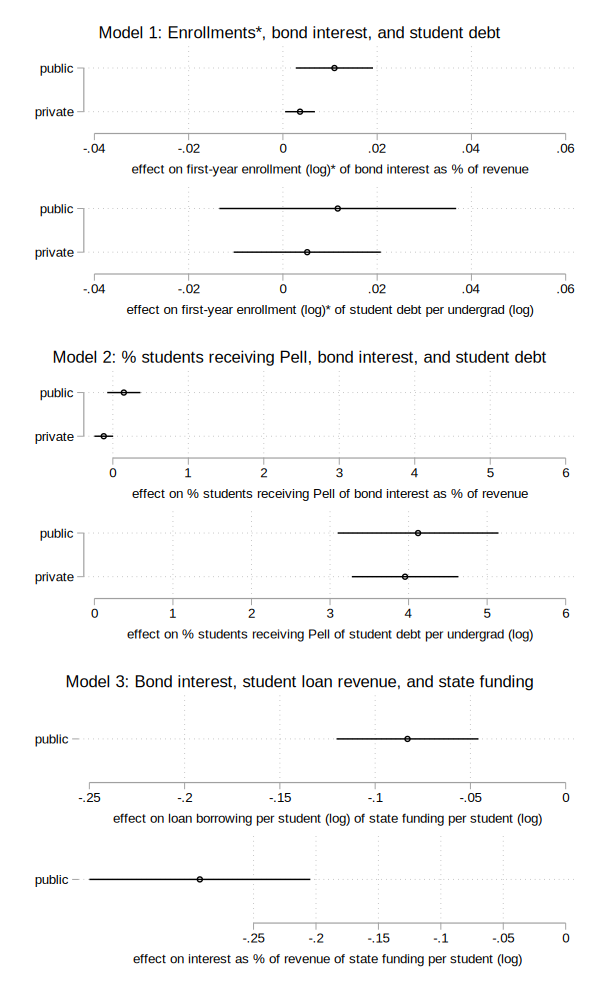




(file f5_enrollmentsfinancestatefunding_bankers6.pdf written in PDF format)


In [411]:
graph combine instatefe pellfe statefunding, col(1) scheme(plotplainblind) ysize(10) iscale(.8)

graph export f5_enrollmentsfinancestatefunding_bankers6.pdf, replace

*xlab(,nogrid) ylab(,nogrid) quietly coefplot public || private, keep(loan_share) xlabel(-1(1)2)

In [44]:
*gen instatefroshln=log(instatefrosh)
*gen loan_a_x1000=loan_a/1000
*gen state03ln = log(state03)
*gen loan_aln=log(loan_a)
*gen total03_revenueln=log(total03_revenue) total03_revenueln




Random-effects GLS regression                   Number of obs     =      5,986
Group variable: systemid                        Number of groups  =        486

R-sq:                                           Obs per group:
     within  = 0.0691                                         min =          1
     between = 0.0057                                         avg =       12.3
     overall = 0.0019                                         max =         17

                                                Wald chi2(18)     =     155.34
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

                             (Std. Err. adjusted for 486 clusters in systemid)
------------------------------------------------------------------------------
             |               Robust
instatefro~n |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      loan_p |    .001208  

r(322);
r(322);


In [9]:
quietly {
    cd "/Users/Charlie/Google Drive/Lincoln Project/IPEDS Disaggregated/Data"
use bankers_chapter6, clear
keep if control==1 & year>2002 & year<2017
collapse (first) control instnm systemnm fips (min) sector iclevel (rawsum) applicants ///
admissions interest2 interest01 fte_count total03_revenue total01 ///
instate total_frosh_res state03 state09 nettuition01 loan_t fgrnt_t fgrnt_d loan_d fgrnt_n ///
(mean) loan_a loan_p [aweight=loan_n], by (systemid year)
*replace state09=state03 if state03>state09 & state03!=.
drop if state03==. | state03==0 | fte_count==.
bys systemid: gen nyear=[_N]
bys systemid: egen maxic=max(iclevel)
bys systemid: egen minic=min(iclevel)
*drop if maxic~=minic
keep if nyear==14
gen state_fte_1k = state03 / fte_count
}
list state_fte_1k if systemid==124557



. list state_fte_1k if systemid==124557

       +----------+
       | state~1k |
       |----------|
 1205. | 14698.51 |
 1206. |  13770.9 |
 1207. | 12703.44 |
 1208. | 11883.57 |
 1209. | 12087.11 |
       |----------|
 1210. | 12686.87 |
 1211. | 13118.11 |
 1212. | 10496.42 |
 1213. | 11838.37 |
 1214. | 11292.65 |
       |----------|
 1215. | 8770.373 |
 1216. | 9382.821 |
 1217. | 9786.939 |
 1218. | 9589.246 |
       +----------+


In [ ]:
/*
use bankers_chapter6, clear
keep if control==1 & year>2002 & year<2017
collapse (first) control instnm systemnm fips (min) sector iclevel (rawsum) applicants ///
admissions interest2 interest01 fte_count total03_revenue total01 ///
instate total_frosh_res state03 state09 nettuition01 loan_t fgrnt_t fgrnt_d loan_d fgrnt_n ///
(mean) loan_a loan_p [aweight=loan_n], by (systemid year)
*replace state09=state03 if state03>state09 & state03!=.
drop if state03==. | state03==0 | fte_count==.
bys systemid: gen nyear=[_N]
bys systemid: egen maxic=max(iclevel)
keep if nyear==14
gen state_fte_1k = state03 / fte_count / 1000
table year if max==1, c(mean state_fte_1k) */


.     noi gr export /Users/Charlie/.stata_kernel_cache/graph$stata_kernel_graph
> _counter.svg, width(600) replace


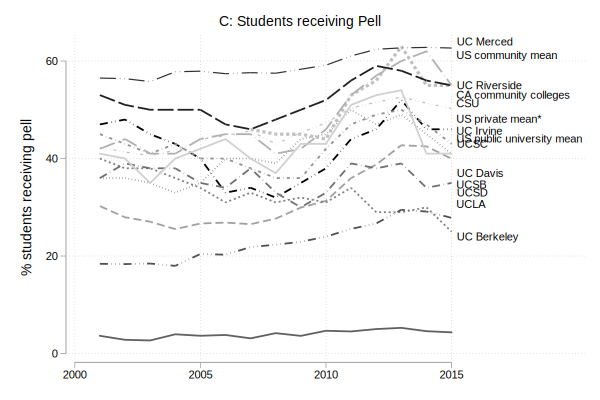

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [415]:
graph display pelltime

In [689]:
quietly {
cd "/Users/Charlie/Google Drive/Lincoln Project/IPEDS Disaggregated/Data"
use bankers_chapter6, clear
keep if iclevel==1 & year>1999 & year<2017
collapse (first) control instnm systemnm fips (min) sector iclevel (rawsum) applicants ///
admissions interest2 interest01 fte_count total03_revenue total01 ///
instate total_frosh_res state03 state09 nettuition01 loan_t fgrnt_t fgrnt_d loan_d fgrnt_n ///
(mean) loan_a loan_p [aweight=loan_n], by (systemid year)
drop if state03==. & control==1
drop if state03==0 & control==1
replace interest01=. if interest01==0 | fte_count==. | total01==. | total01==0 | year<2003
bys systemid: gen nyear=[_N] if interest01!=.
*replace interest01=. if nyear!=14
gen state_fte_1k = state03 / fte_count
gen sectorca=1 if control==1
replace sectorca =2 if control==2
replace sectorca=3 if systemid==124557
replace sectorca=4 if systemid==110501
    drop if sectorca==.
label values sectorca sectorca
replace interest01=747800000 if year==2016 & systemid==124557
replace interest01=755400000 if year==2015 & systemid==124557
replace interest01=692400000 if year==2014 & systemid==124557
replace interest01=745000000 if year==2013 & systemid==124557
replace interest01=708300000 if year==2012 & systemid==124557
replace interest01=636400000 if year==2011 & systemid==124557
replace interest01=554200000 if year==2010 & systemid==124557
replace interest01=445500000 if year==2009 & systemid==124557
replace interest01=425700000 if year==2008 & systemid==124557
replace interest01=419100000 if year==2007 & systemid==124557
replace interest01=394100000 if year==2006 & systemid==124557
replace interest01=324900000 if year==2005 & systemid==124557
replace interest01=291800000 if year==2004 & systemid==124557
replace interest01=. if year==2003 & systemid==124557

replace total01=32490680000 if year==2016 & systemid==124557
replace total01=28801683000 if year==2015 & systemid==124557
replace total01=26949064000 if year==2014 & systemid==124557
replace total01=26612773000 if year==2013 & systemid==124557
replace total01=25414156000 if year==2012 & systemid==124557
replace total01=24153724000 if year==2011 & systemid==124557
replace total01=22928559000 if year==2010 & systemid==124557
replace total01=20841776000 if year==2009 & systemid==124557
replace total01=20163767000 if year==2008 & systemid==124557
replace total01=18723709000 if year==2007 & systemid==124557
replace total01=19516703000 if year==2006 & systemid==124557
replace total01=18608908000 if year==2005 & systemid==124557
replace total01=17925819000 if year==2004 & systemid==124557

gen total03_revenue2=26265824000+3680318000 if year==2016 & systemid==124557
replace total03_revenue2=24170173000+4360743000 if year==2015 & systemid==124557
replace total03_revenue2=22367639000+5453505000 if year==2014 & systemid==124557
replace total03_revenue2=20208338000+4017755000 if year==2013 & systemid==124557
replace total03_revenue2=20208338000+2960406000 if year==2012 & systemid==124557
replace total03_revenue2=19039763000+5074231000 if year==2011 & systemid==124557
replace total03_revenue2=17326403000+4716998000 if year==2010 & systemid==124557
replace total03_revenue2=15866621000+2244519000 if year==2009 & systemid==124557
replace total03_revenue2=15458899000+3787509000 if year==2008 & systemid==124557
replace total03_revenue2=15465229000+4713981000 if year==2007 & systemid==124557
replace total03_revenue2=16769633000+3738360000 if year==2006 & systemid==124557
replace total03_revenue2=15799629000+3408496000 if year==2005 & systemid==124557
replace total03_revenue2=15121462000+3590030000 if year==2004 & systemid==124557
*replace total03_revenue2= if year=2003 & systemid==124557
replace total03_revenue=total03_revenue2 if systemid==124557
gen interest_share=interest01 / total01 * 100
collapse (mean) interest_share state_fte_1k  ///
, by(sectorca year)
xtset sectorca year
    
quietly xtline state_fte_1k if sectorca!=2, overlay name(statefund, replace) ///
plot1opts(lp(solid) lw(medthick) lc(gs12)) ///
plot2opts(lp(solid) lw(medthick) lc(black)) ///
plot3opts(lp(dash) lw(medthick) lc(black)) ///
legend(position(6) order(2 "UC system" 1 "public universities in other states" ///
    3 "CSU system")) scheme(plotplain) xtitle("") xlabel(2000(5)2020) ///
    ylabel(2500(2500)15000, format(%9.0fc)) ytitle("state $ per student (2017$)") title(B: State funding per student, position(12))
    
quietly xtline interest_share, overlay name(interest, replace) ///
plot1opts(lp(solid) lw(medthick) lc(gs12)) ///
plot2opts(lp(shortdash) lw(medthick) lc(gs12)) ///
plot3opts(lp(solid) lw(medthick) lc(black)) ///
plot4opts(lp(dash) lw(medthick) lc(black)) ///
legend(position(6) order(2 "private universities" 4 "CSU system" ///
    3 "UC system" 1 "public universities in other states" )) ///
   scheme(plotplain) xtitle("") xlabel(2000(5)2020) ///
     ytitle("% spending on interest") ylabel(0.5(.5)3) title(A: University spending on interest, position(12))
    }

In [ ]:
gen total03_revenue2=26265824000-1259768000+3680318000 if year=2016 & systemid==124557
replace total03_revenue2=24170173000-1234509000+4360743000 if year=2015 & systemid==124557
replace total03_revenue2=22367639000-1250820000+5453505000 if year=2014 & systemid==124557
replace total03_revenue2=20208338000-1032350000+4017755000 if year=2013 & systemid==124557
replace total03_revenue2=20208338000-1014199000+2960406000 if year=2012 & systemid==124557
replace total03_revenue2=19039763000-976294000+5074231000 if year=2011 & systemid==124557
replace total03_revenue2=17326403000-910194000+4716998000 if year=2010 & systemid==124557
replace total03_revenue2=15866621000-667983000+2244519000 if year=2009 & systemid==124557
replace total03_revenue2=15458899000-1048580000+3787509000 if year=2008 & systemid==124557
replace total03_revenue2=15465229000-2188475000+4713981000 if year=2007 & systemid==124557
replace total03_revenue2=16769633000-4231922000+3738360000 if year=2006 & systemid==124557
replace total03_revenue2=15799629000-4146261000+3408496000 if year=2005 & systemid==124557
replace total03_revenue2=15121462000-4115635000+3590030000 if year=2004 & systemid==124557
replace total03_revenue2= if year=2003 & systemid==124557*/

In [ ]:
gen total03_revenue2=26265824000-1259768000+3680318000 if year=2016 & systemid==124557
replace total03_revenue2=24170173000-1234509000+4360743000 if year=2015 & systemid==124557
replace total03_revenue2=22367639000-1250820000+5453505000 if year=2014 & systemid==124557
replace total03_revenue2=20208338000-1032350000+4017755000 if year=2013 & systemid==124557
replace total03_revenue2=20208338000-1014199000+2960406000 if year=2012 & systemid==124557
replace total03_revenue2=19039763000-976294000+5074231000 if year=2011 & systemid==124557
replace total03_revenue2=17326403000-910194000+4716998000 if year=2010 & systemid==124557
replace total03_revenue2=15866621000-667983000+2244519000 if year=2009 & systemid==124557
replace total03_revenue2=15458899000-1048580000+3787509000 if year=2008 & systemid==124557
replace total03_revenue2=15465229000-2188475000+4713981000 if year=2007 & systemid==124557
replace total03_revenue2=16769633000-4231922000+3738360000 if year=2006 & systemid==124557
replace total03_revenue2=15799629000-4146261000+3408496000 if year=2005 & systemid==124557
replace total03_revenue2=15121462000-4115635000+3590030000 if year=2004 & systemid==124557
replace total03_revenue2= if year=2003 & systemid==124557*/

